In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [10]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

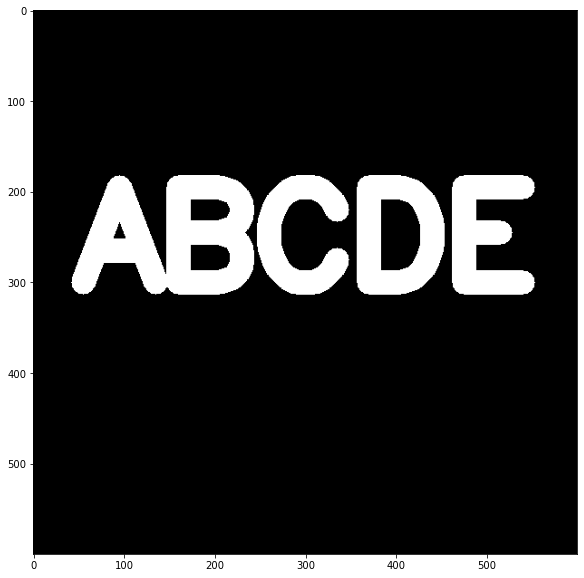

In [11]:
img = load_img()
display_img(img)

In [12]:
kernel = np.ones((5,5), dtype = np.uint8)

In [13]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [20]:
result = cv2.erode(img, kernel, iterations = 4)

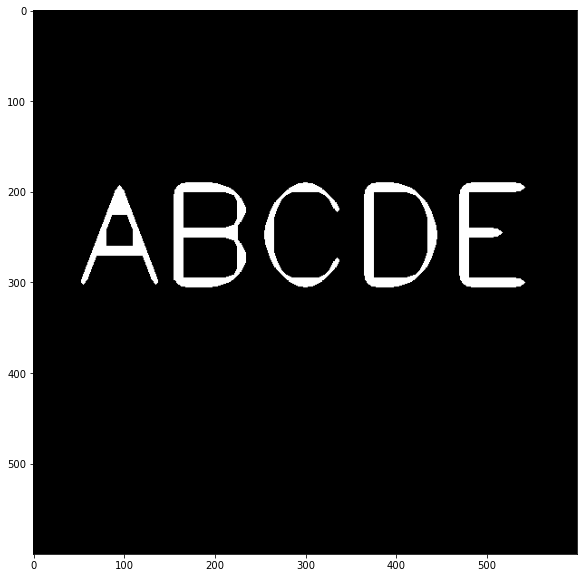

In [21]:
display_img(result)

In [29]:
#openeing(could be helpfull by removing some background noise) --> erosion followed by dialation
img = load_img()

In [30]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

In [31]:
white_noise

array([[0, 1, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 0, 0, 1]])

In [26]:
img.max()

255.0

In [32]:
#why> --> because before the values was 0s and 1s but we need it to be 0s and 255s to be able to put it on img
white_noise = white_noise*255

In [33]:
white_noise

array([[  0, 255, 255, ...,   0, 255,   0],
       [  0,   0,   0, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255,   0, ...,   0,   0, 255]])

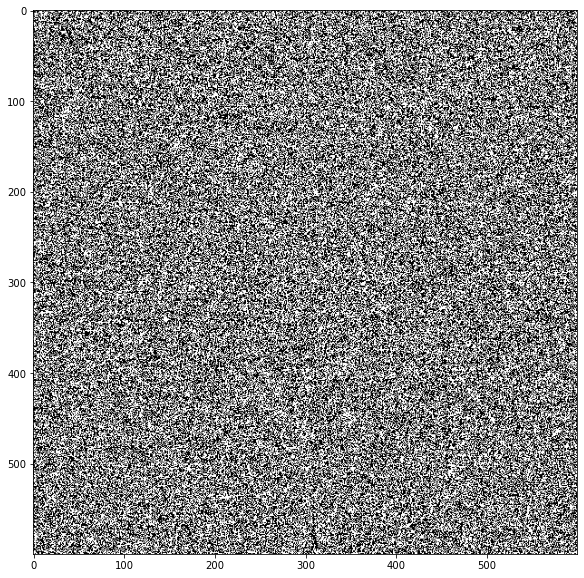

In [34]:
display_img(white_noise)

In [35]:
noise_img = white_noise+img

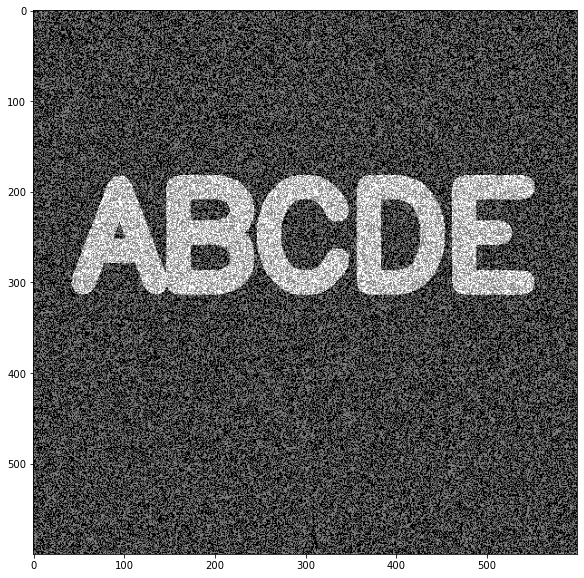

In [37]:
display_img(noise_img)

In [40]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

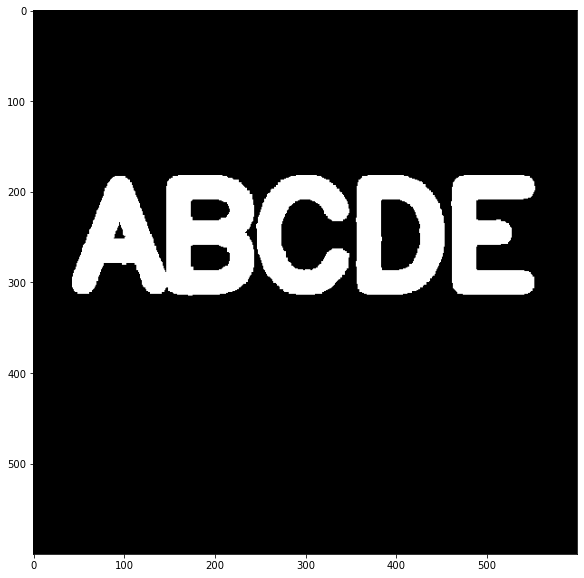

In [41]:
display_img(opening)

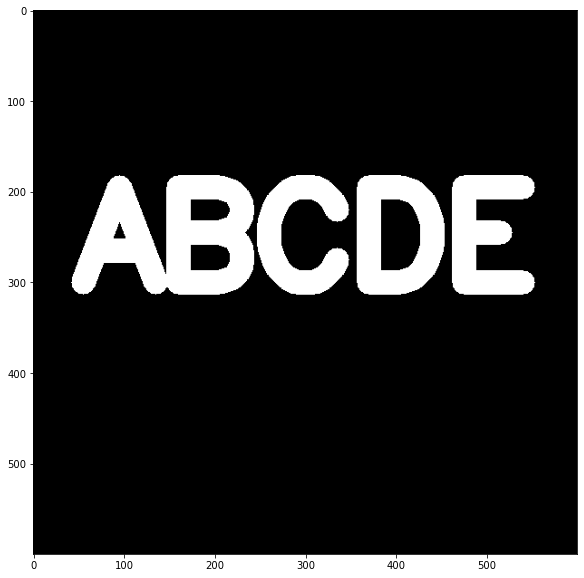

In [42]:
display_img(img)

In [44]:
img = load_img()

In [45]:
black_noise = np.random.randint(low=0, high=2, size=(600,600))

In [47]:
black_noise = black_noise*-255

In [48]:
black_noise

array([[-255,    0, -255, ...,    0, -255, -255],
       [-255,    0,    0, ..., -255,    0, -255],
       [-255, -255,    0, ...,    0,    0, -255],
       ...,
       [-255,    0, -255, ...,    0,    0, -255],
       [-255,    0,    0, ...,    0,    0,    0],
       [-255,    0,    0, ...,    0,    0,    0]])

In [49]:
black_noise_img = img+black_noise

In [50]:
black_noise_img

array([[-255.,    0., -255., ...,    0., -255., -255.],
       [-255.,    0.,    0., ..., -255.,    0., -255.],
       [-255., -255.,    0., ...,    0.,    0., -255.],
       ...,
       [-255.,    0., -255., ...,    0.,    0., -255.],
       [-255.,    0.,    0., ...,    0.,    0.,    0.],
       [-255.,    0.,    0., ...,    0.,    0.,    0.]])

In [52]:
black_noise_img[black_noise_img == -255]=0

In [54]:
black_noise_img.min()

0.0

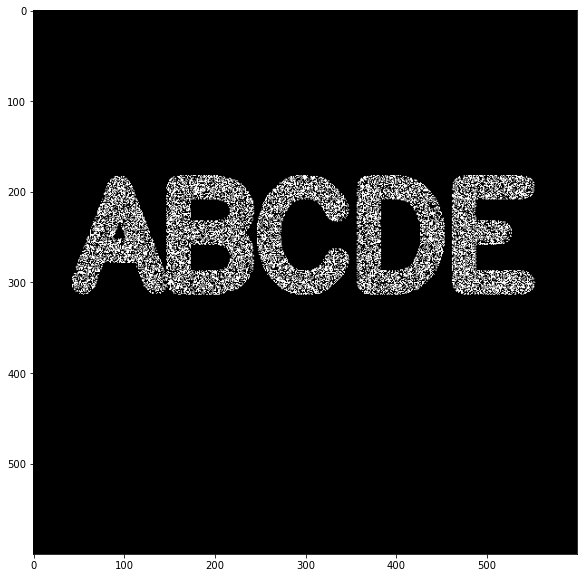

In [55]:
display_img(black_noise_img)

In [56]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

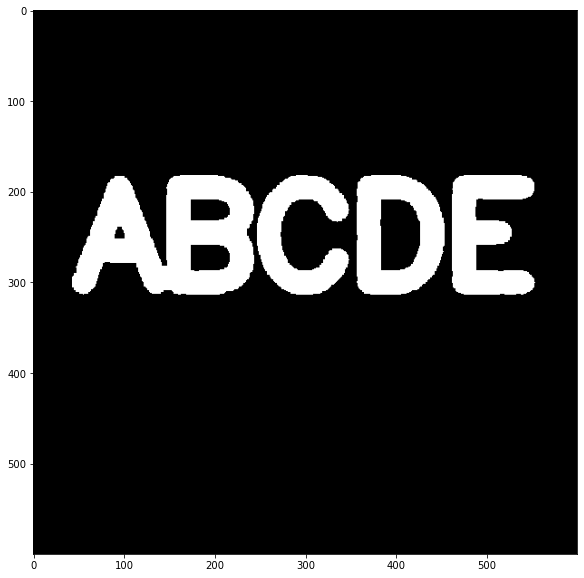

In [57]:
display_img(closing)

In [58]:
img = load_img()

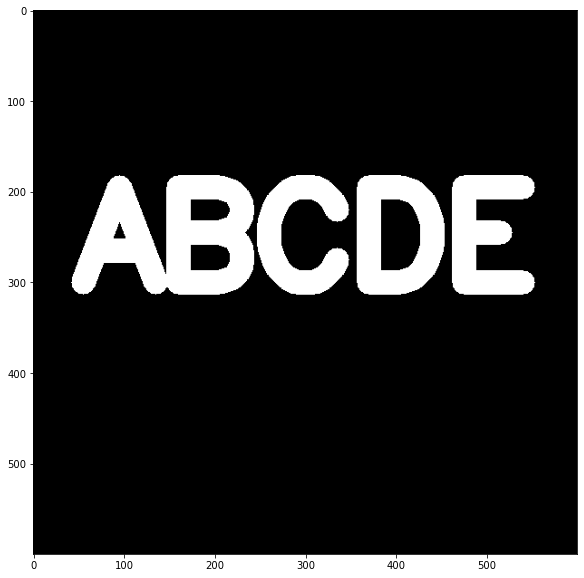

In [59]:
display_img(img)

In [61]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

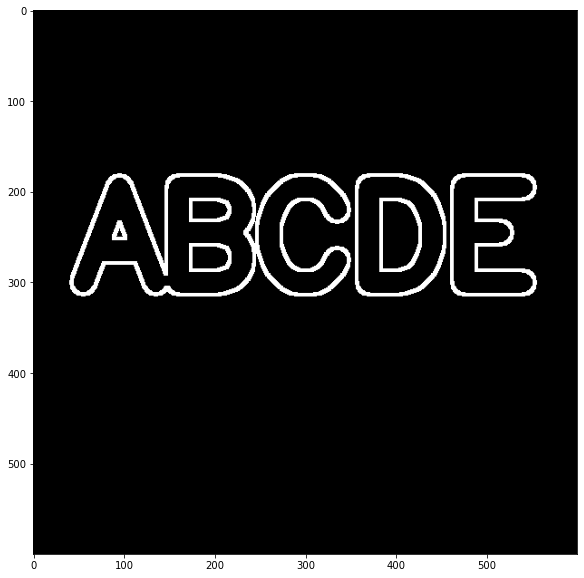

In [62]:
display_img(gradient)